# **Insurance Claim Prediction using Machine Learning**
### **Objective**
To develop a predictive model that estimates **insurance claim severity**, aiding in **pricing decisions** and **risk management**.


 ### **Data Loading**
We begin by loading the insurance claims dataset and inspecting its structure.

In [1]:
import pandas as pd
file_path = "C:/Users/navya/Downloads/insurance_claims_data (1).csv" # Ensure the correct path if needed
df = pd.read_csv(file_path)
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   age  gender  location  car_age   car_type  engine_power  num_past_claims  \
0   56    Male     Rural        7      Truck           205                0   
1   69  Female  Suburban        2  Hatchback           205                1   
2   46  Female     Rural        6      Sedan           251                4   
3   32  Female     Rural        7        SUV           390                2   
4   60  Female     Urban        2  Hatchback           391                1   

   total_past_claim_amount  coverage_type  deductible_amount  \
0             23301.705975        Premium               1321   
1             26697.820429  Comprehensive               4338   
2             12113.809699        Premium               2735   
3              8642.736971  Comprehensive               3040   
4             41150.058745  Comprehensive               2802   

  accident_severity  claim_amount  
0          Moderate   3652.116085  
1            Severe   7289.912132  
2             Min

In [2]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   location                 5000 non-null   object 
 3   car_age                  5000 non-null   int64  
 4   car_type                 5000 non-null   object 
 5   engine_power             5000 non-null   int64  
 6   num_past_claims          5000 non-null   int64  
 7   total_past_claim_amount  5000 non-null   float64
 8   coverage_type            5000 non-null   object 
 9   deductible_amount        5000 non-null   int64  
 10  accident_severity        5000 non-null   object 
 11  claim_amount             5000 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 468.9+ KB
None


In [3]:
print(df.describe())

               age      car_age  engine_power  num_past_claims  \
count  5000.000000  5000.000000   5000.000000       5000.00000   
mean     48.805600     7.044400    222.484400          2.05100   
std      17.906991     4.296943    100.196818          1.41393   
min      18.000000     0.000000     50.000000          0.00000   
25%      34.000000     3.000000    135.000000          1.00000   
50%      49.000000     7.000000    221.000000          2.00000   
75%      64.000000    11.000000    308.000000          3.00000   
max      79.000000    14.000000    399.000000          4.00000   

       total_past_claim_amount  deductible_amount  claim_amount  
count              5000.000000        5000.000000   5000.000000  
mean              25224.641288        2754.479000   5699.181991  
std               14532.919805        1291.214704   3314.511223  
min                  10.069907         500.000000    845.851283  
25%               12714.840082        1668.000000   2791.945288  
50%      

In [4]:
df.duplicated().sum() 

0

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                        0
gender                     0
location                   0
car_age                    0
car_type                   0
engine_power               0
num_past_claims            0
total_past_claim_amount    0
coverage_type              0
deductible_amount          0
accident_severity          0
claim_amount               0
dtype: int64


In [6]:
# Check unique values in categorical columns
categorical_columns = ['gender', 'location', 'car_type', 'coverage_type','accident_severity']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in gender:
['Male' 'Female']

Unique values in location:
['Rural' 'Suburban' 'Urban']

Unique values in car_type:
['Truck' 'Hatchback' 'Sedan' 'SUV']

Unique values in coverage_type:
['Premium' 'Comprehensive' 'Basic']

Unique values in accident_severity:
['Moderate' 'Severe' 'Minor']


### **Exploratory Data Analysis (EDA) & Preprocessing**


#### **univariate Analysis**

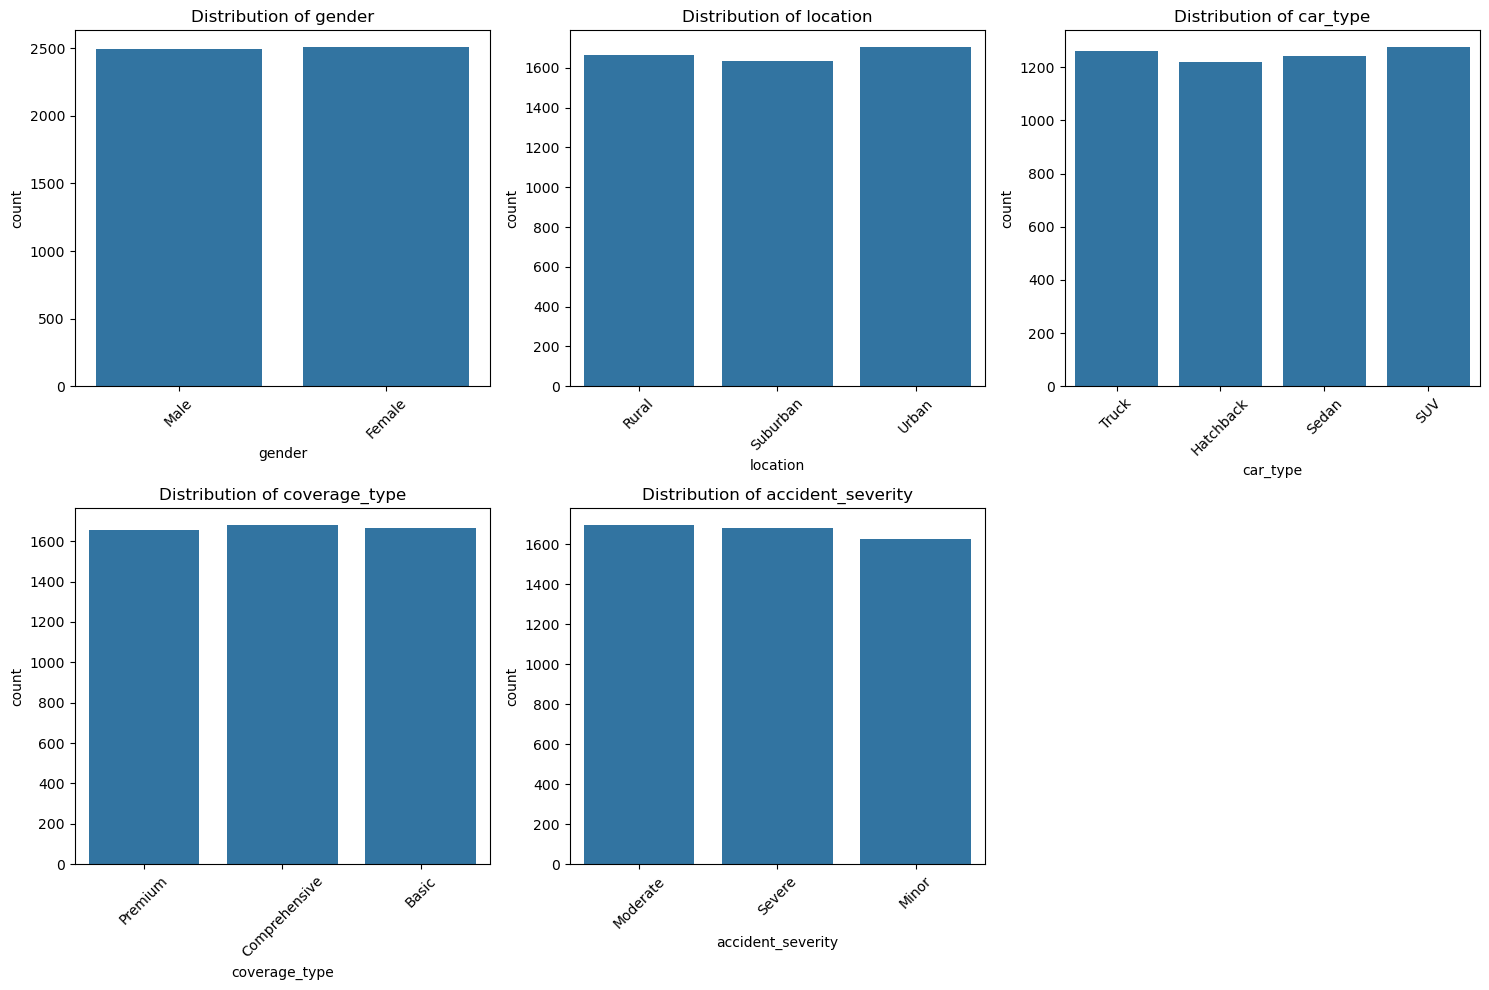

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['gender', 'location', 'car_type', 'coverage_type', 'accident_severity']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

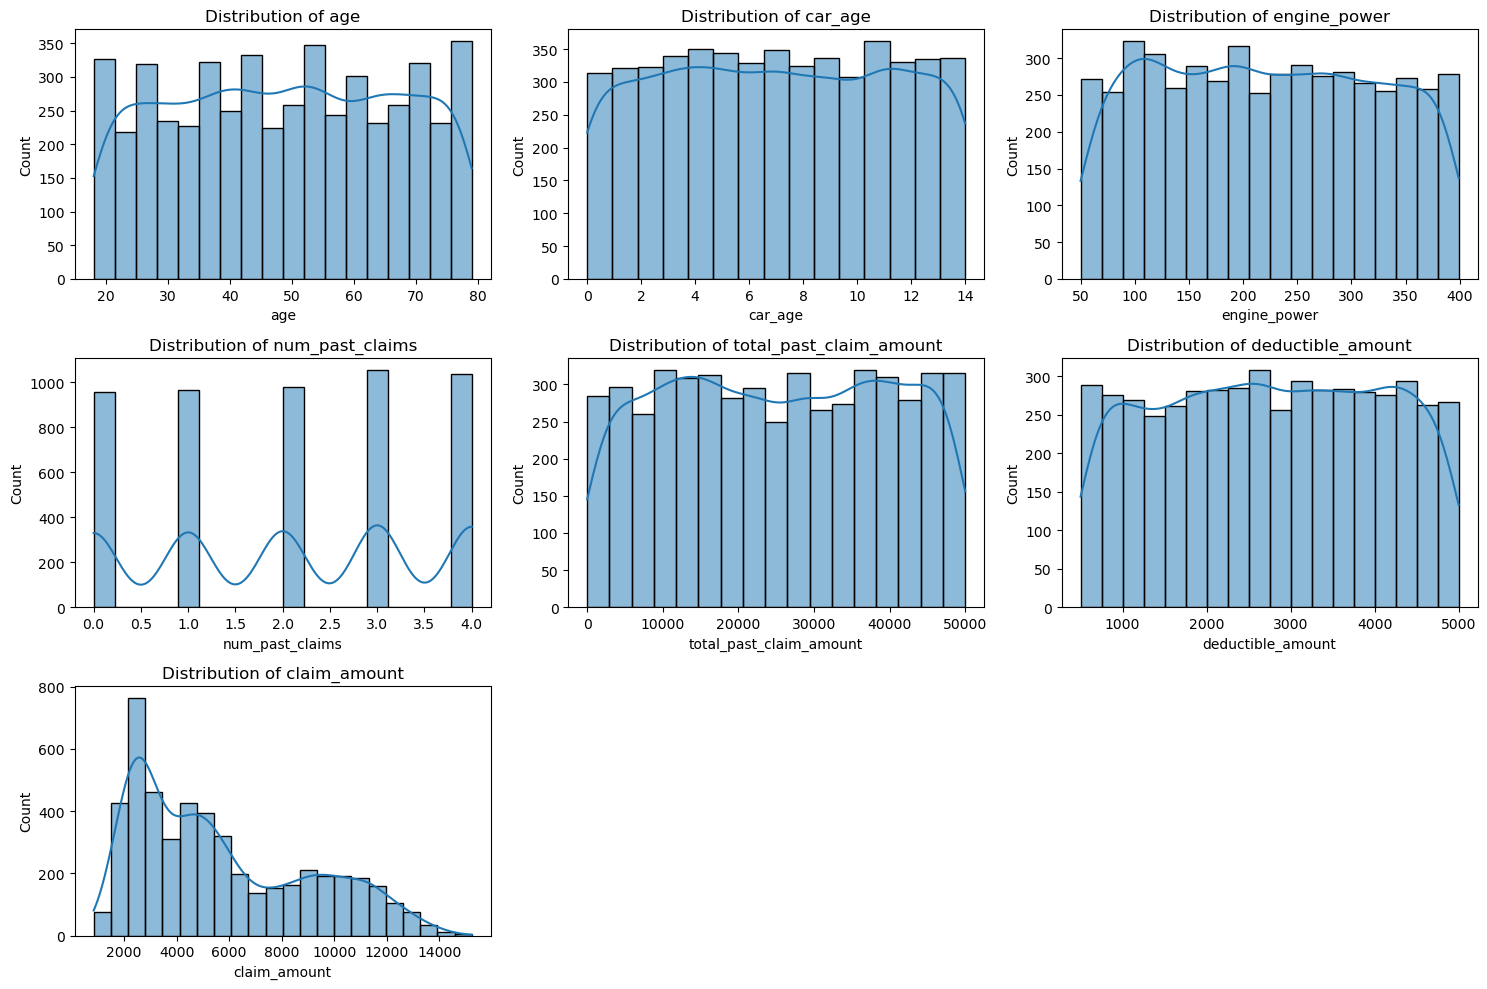

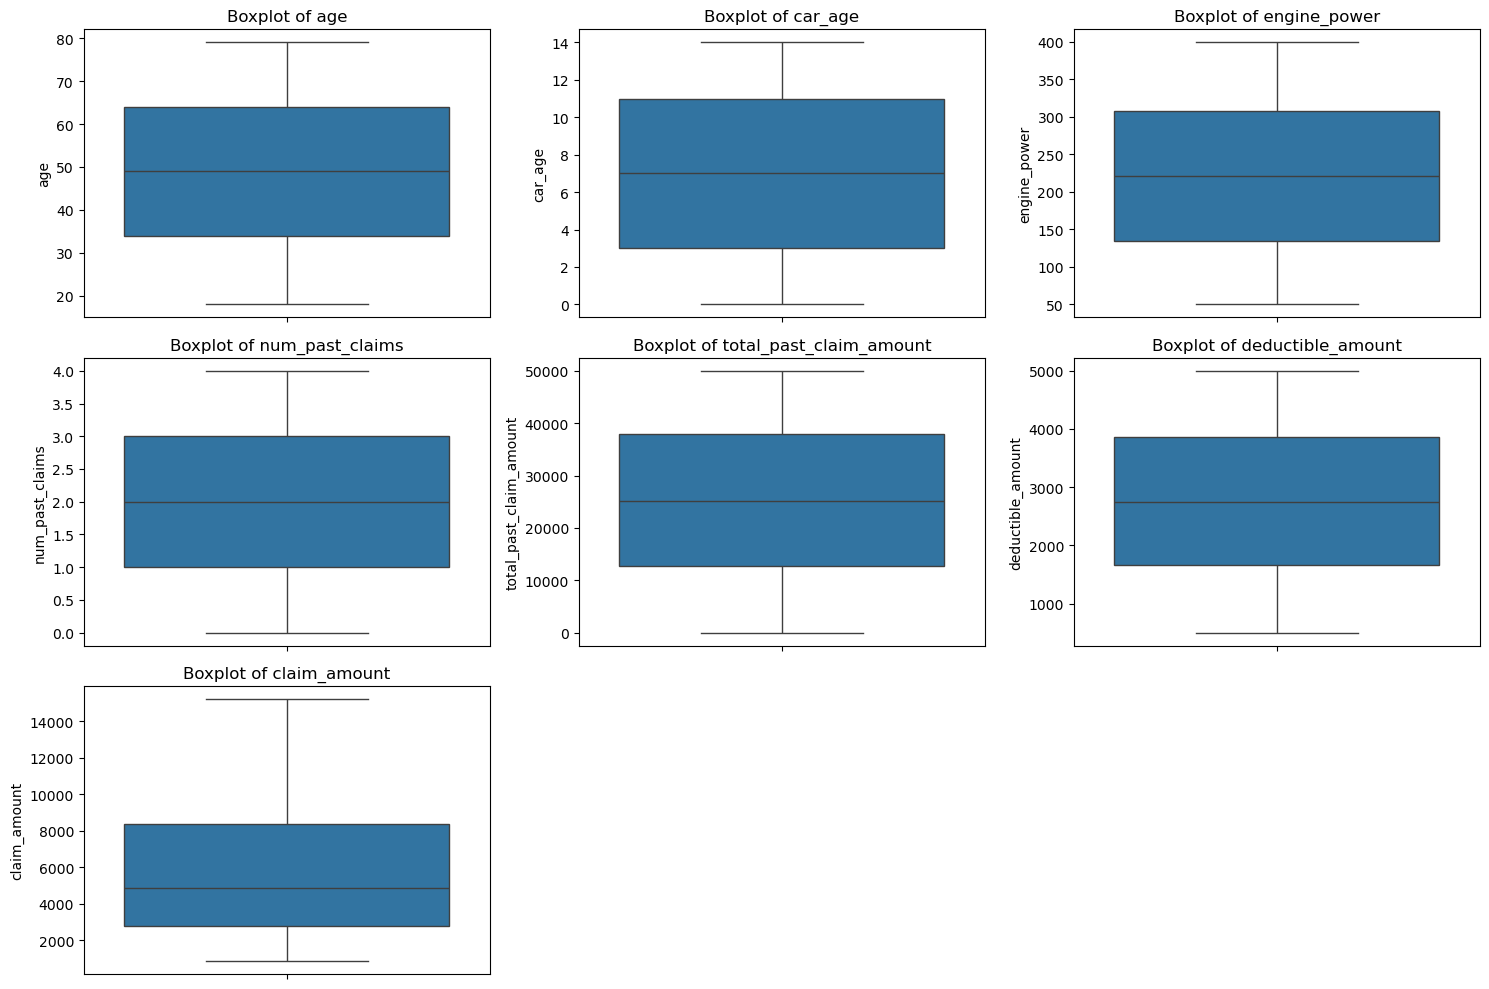

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'car_age', 'engine_power', 'num_past_claims', 'total_past_claim_amount', 'deductible_amount', 'claim_amount']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=feature, kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=feature)  # Box plots
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#### **Bivariate Analysis**

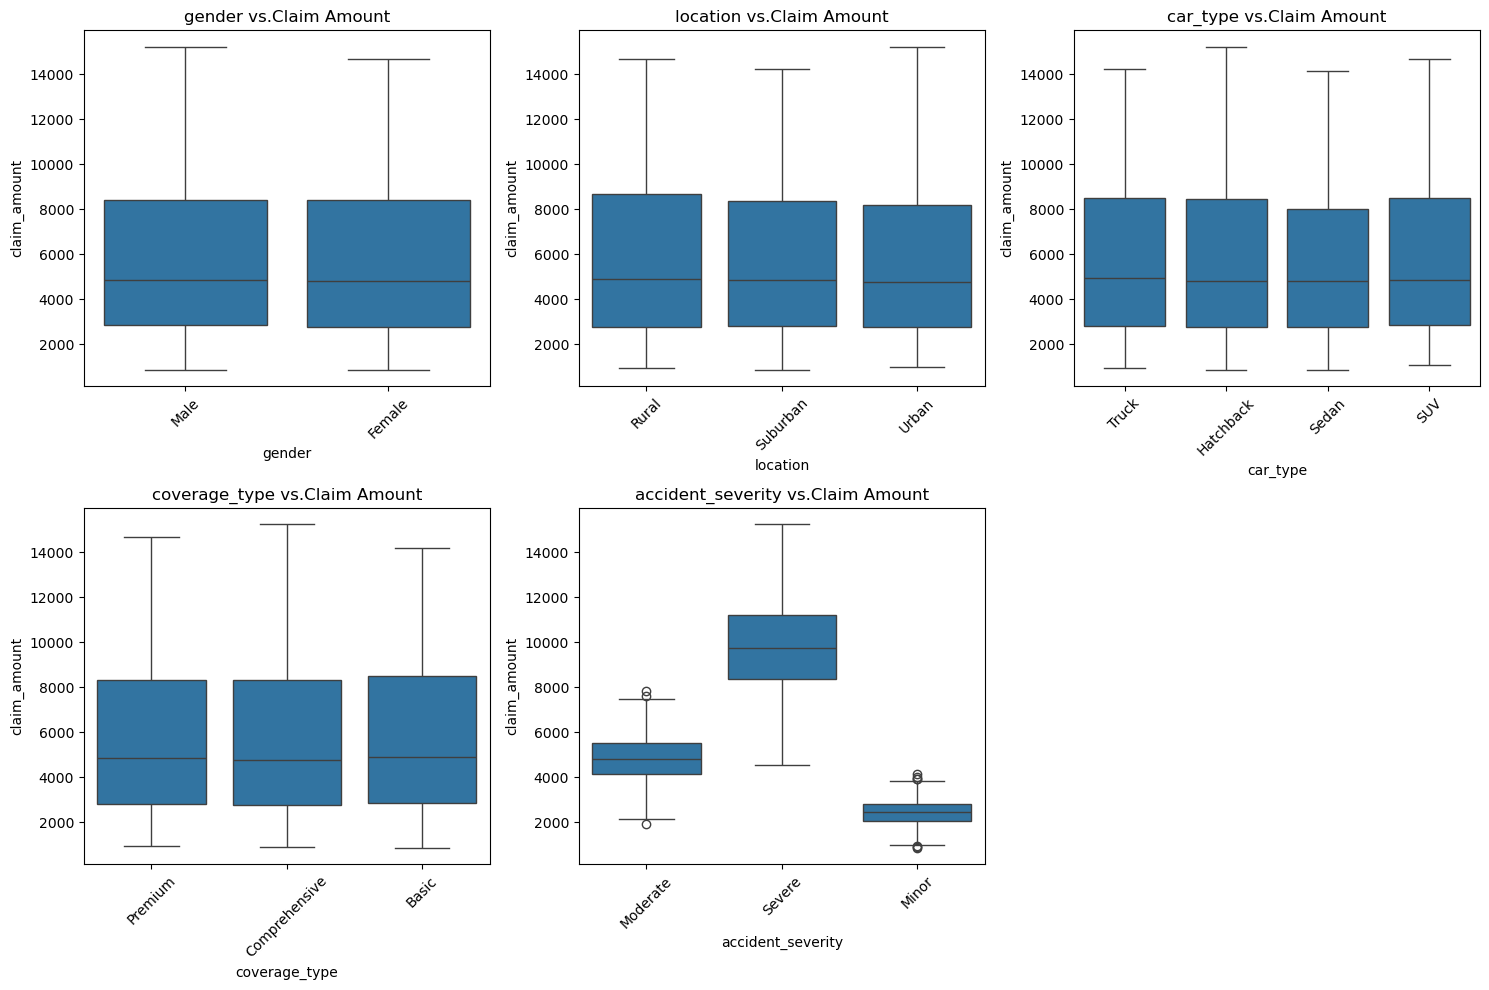

In [9]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=feature, y='claim_amount')
    plt.title(f'{feature} vs.Claim Amount')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

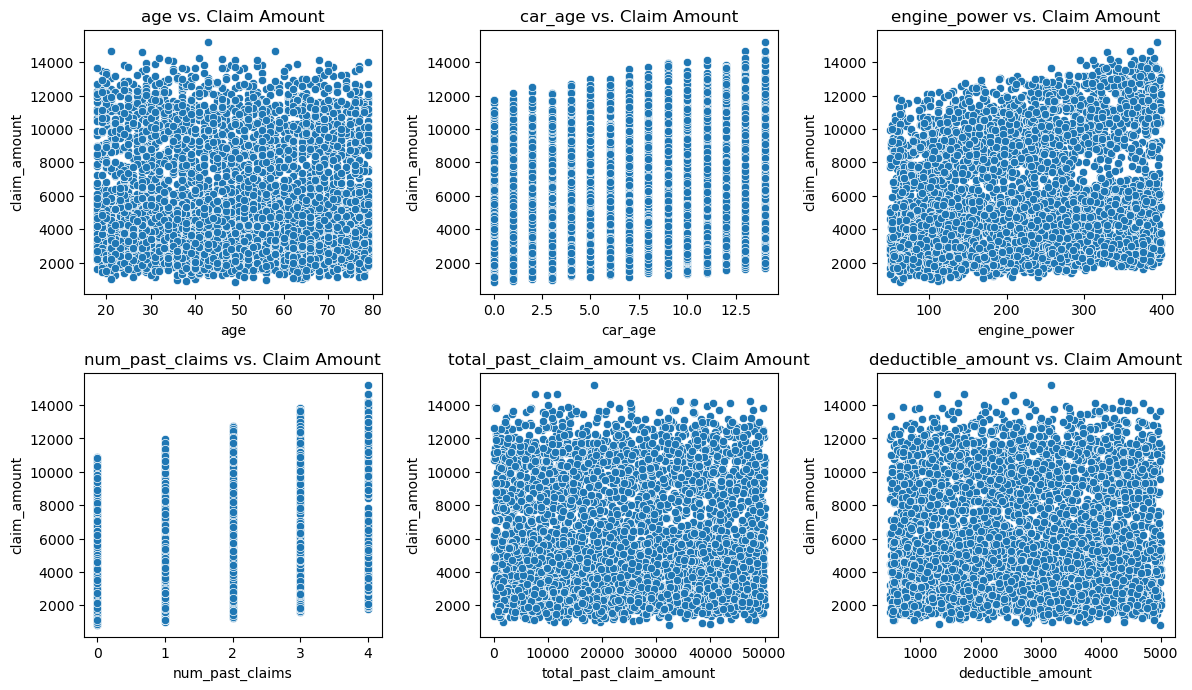

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for numerical features vs. claim_amount_log
num_features = ["age", "car_age", "engine_power", "num_past_claims", 
                "total_past_claim_amount", "deductible_amount"]

plt.figure(figsize=(12, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df["claim_amount"])
    plt.title(f"{col} vs. Claim Amount")
plt.tight_layout()
plt.show()

#### **Outlier Detection and Distribution Analysis**


Skewness of numerical features:
age                       -0.013819
car_age                   -0.001061
engine_power               0.038984
num_past_claims           -0.055415
total_past_claim_amount   -0.006863
deductible_amount         -0.023873
dtype: float64


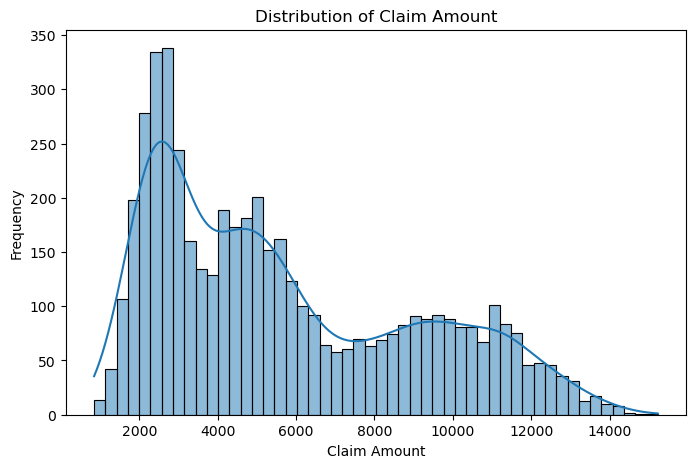

In [13]:


# Check skewness of numerical variables
print("\nSkewness of numerical features:")
print(df[num_features].skew())

# Histogram for claim_amount
plt.figure(figsize=(8, 5))
sns.histplot(df["claim_amount"], bins=50, kde=True)
plt.title("Distribution of Claim Amount")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()


In [16]:
#Check skewness of numerical columns
print(df[num_features].skew())

age                       -0.013819
car_age                   -0.001061
engine_power               0.038984
num_past_claims           -0.055415
total_past_claim_amount   -0.006863
deductible_amount         -0.023873
dtype: float64


##### **log Transformation on Claim Amount**

In [17]:
import numpy as np

df["claim_amount_log"] = np.log1p(df["claim_amount"])  # log(1 + x) to handle zero values

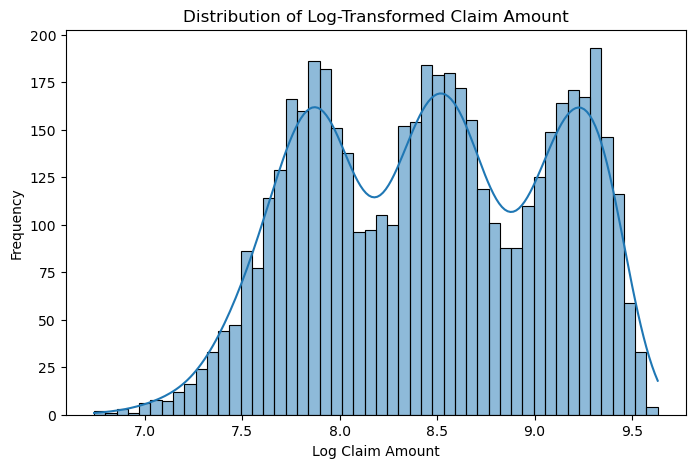

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["claim_amount_log"], kde=True, bins=50, alpha=0.5)
plt.title("Distribution of Log-Transformed Claim Amount")
plt.xlabel("Log Claim Amount")
plt.ylabel("Frequency")
plt.show()

#### **Categorical Variable Encoding**

In [19]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
df = pd.get_dummies(df, columns=["location", "car_type", "coverage_type", "accident_severity"], drop_first=True)
print(df.dtypes) 

Categorical Columns: Index(['gender', 'location', 'car_type', 'coverage_type', 'accident_severity'], dtype='object')
age                              int64
gender                           int64
car_age                          int64
engine_power                     int64
num_past_claims                  int64
total_past_claim_amount        float64
deductible_amount                int64
claim_amount                   float64
claim_amount_log               float64
location_Suburban                 bool
location_Urban                    bool
car_type_SUV                      bool
car_type_Sedan                    bool
car_type_Truck                    bool
coverage_type_Comprehensive       bool
coverage_type_Premium             bool
accident_severity_Moderate        bool
accident_severity_Severe          bool
dtype: object


#### **Correlation Analysis**

In [20]:
correlations = df.corr()
print(correlations["claim_amount_log"].sort_values(ascending=False))


claim_amount_log               1.000000
claim_amount                   0.963669
accident_severity_Severe       0.810152
num_past_claims                0.234096
car_age                        0.191530
engine_power                   0.166120
deductible_amount              0.024629
car_type_Truck                 0.013180
car_type_SUV                   0.011852
location_Suburban              0.002323
gender                         0.000141
coverage_type_Premium         -0.002644
total_past_claim_amount       -0.007055
coverage_type_Comprehensive   -0.015875
car_type_Sedan                -0.016049
location_Urban                -0.016461
accident_severity_Moderate    -0.018066
age                           -0.028318
Name: claim_amount_log, dtype: float64


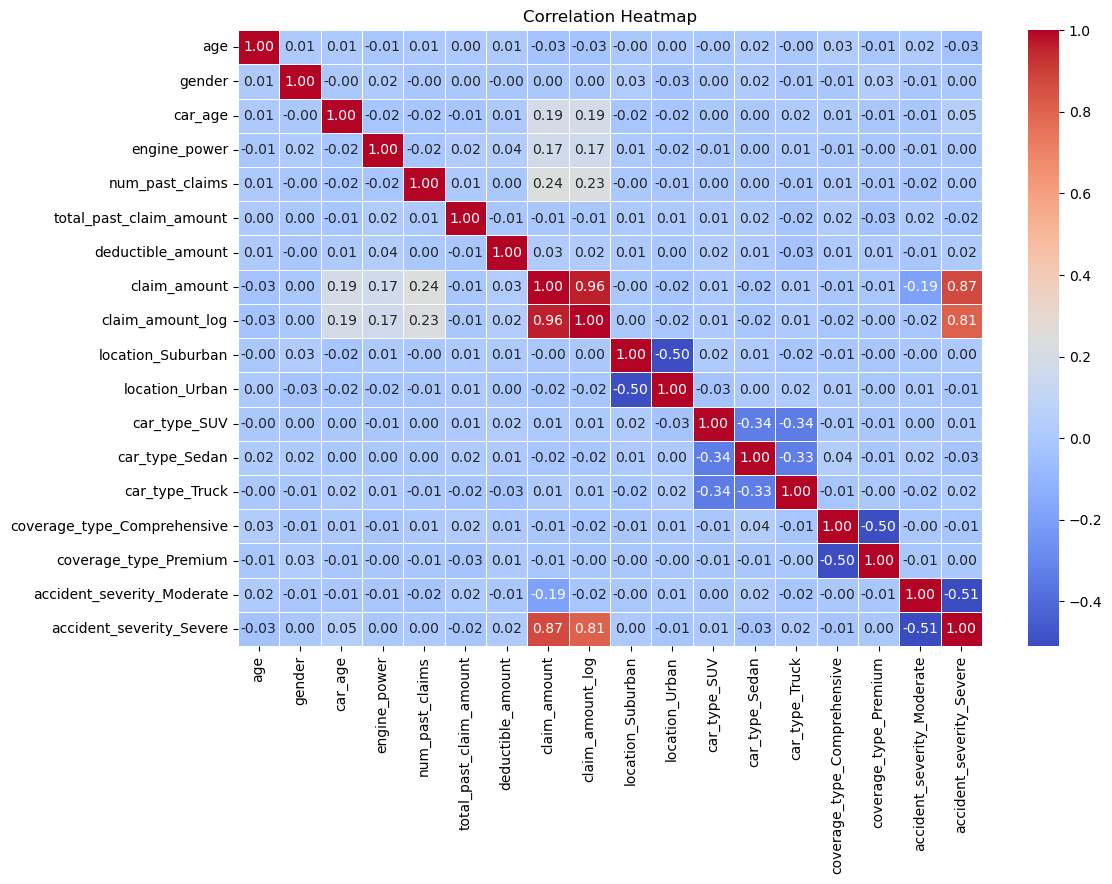

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlations = df.corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#### **Multicollinearity Check (VIF Analysis)**

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numerical features only
X = df.select_dtypes(include=['number'])  

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display results
print(vif_data)

                   Feature        VIF
0                      age   8.411658
1                   gender   2.004990
2                  car_age   3.866396
3             engine_power   6.161537
4          num_past_claims   3.328823
5  total_past_claim_amount   4.015359
6        deductible_amount   5.552437
7             claim_amount   5.701933
8         claim_amount_log  34.396155


In [23]:
# Drop claim_amount_log and recompute VIF
X_selected = X.drop(columns=["claim_amount_log"])

vif_data_new = pd.DataFrame()
vif_data_new["Feature"] = X_selected.columns
vif_data_new["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif_data_new)

                   Feature       VIF
0                      age  6.138141
1                   gender  1.940324
2                  car_age  3.540181
3             engine_power  5.259497
4          num_past_claims  3.138652
5  total_past_claim_amount  3.581324
6        deductible_amount  4.740166
7             claim_amount  4.461899


#### **Feature scaling**

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical features
X_scaled = pd.DataFrame(scaler.fit_transform(X_selected), columns=X_selected.columns)

# Verify the transformation
print(X_scaled.head())

        age    gender   car_age  engine_power  num_past_claims  \
0  0.401805 -1.002403 -0.010334     -0.174518        -1.450712   
1  1.127851  0.997603 -1.174068     -0.174518        -0.743392   
2 -0.156692  0.997603 -0.243081      0.284624         1.378565   
3 -0.938588  0.997603 -0.010334      1.672033        -0.036073   
4  0.625204  0.997603 -1.174068      1.682014        -0.743392   

   total_past_claim_amount  deductible_amount  claim_amount  
0                -0.132329          -1.110290     -0.617669  
1                 0.101379           1.226504      0.479977  
2                -0.902237          -0.015087     -0.885111  
3                -1.141103           0.221148      0.033641  
4                 1.095926           0.036807     -0.233892  


### **Model Training & Evaluation**

In [25]:
# Define target variable
y = df["claim_amount_log"]

# Drop 'claim_amount' before scaling
X = df.drop(columns=["claim_amount", "claim_amount_log"])  # Drop both to avoid leakage

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.0679
MSE: 0.0083
R² Score: 0.9770


#### **Hypothesis Testing**

In [27]:
import statsmodels.api as sm
import pandas as pd

# Add a constant term for the intercept
X_train_with_const = sm.add_constant(X_train)

# Fit the Linear Regression model
model_lr = sm.OLS(y_train, X_train_with_const).fit()

# Print the model summary, which includes coefficients and p-values
print(model_lr.summary())

# Extract coefficients and p-values into a DataFrame
results_df = pd.DataFrame({'Feature': model_lr.params.index, 
                           'Coefficient': model_lr.params.values, 
                           'P-value': model_lr.pvalues.values})

print(results_df)

                            OLS Regression Results                            
Dep. Variable:       claim_amount_log   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.145e+04
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:03:48   Log-Likelihood:                 3986.9
No. Observations:                4000   AIC:                            -7940.
Df Residuals:                    3983   BIC:                            -7833.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4699      0.001   5983.324      0.0

#### **Residual Analysis**

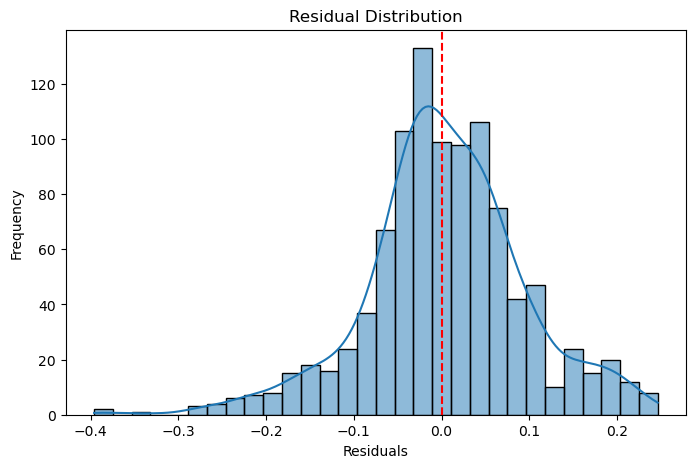

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest MAE: 0.0673
Random Forest MSE: 0.0082
Random Forest R² Score: 0.9770


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate model
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MAE: {gb_mae:.4f}")
print(f"Gradient Boosting MSE: {gb_mse:.4f}")
print(f"Gradient Boosting R² Score: {gb_r2:.4f}")

Gradient Boosting MAE: 0.0645
Gradient Boosting MSE: 0.0077
Gradient Boosting R² Score: 0.9786


In [31]:
from xgboost import XGBRegressor

# Initialize XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {xgb_mae:.4f}")
print(f"XGBoost MSE: {xgb_mse:.4f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")

XGBoost MAE: 0.0671
XGBoost MSE: 0.0083
XGBoost R² Score: 0.9768


In [32]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "MAE": [mae, rf_mae, gb_mae, xgb_mae],
    "MSE": [mse, rf_mse, gb_mse, xgb_mse],
    "R² Score": [r2, rf_r2, gb_r2, xgb_r2]
})

print(results.sort_values(by="R² Score", ascending=False))


               Model       MAE       MSE  R² Score
2  Gradient Boosting  0.064502  0.007678  0.978633
1      Random Forest  0.067253  0.008247  0.977048
0  Linear Regression  0.067938  0.008255  0.977026
3            XGBoost  0.067110  0.008334  0.976806


In [ ]:
#### **Feature impor

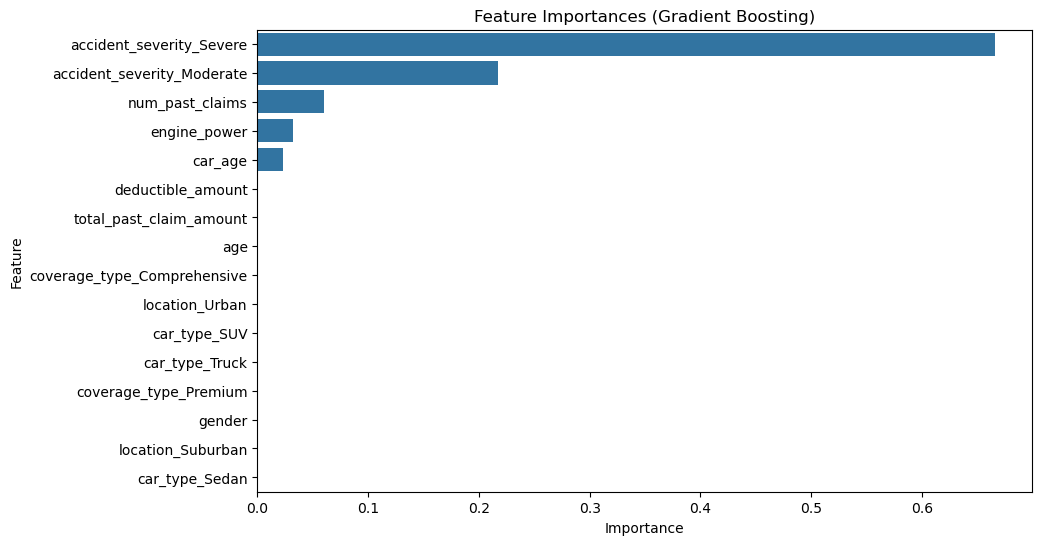

                        Feature  Importance
15     accident_severity_Severe    0.666316
14   accident_severity_Moderate    0.217418
4               num_past_claims    0.060386
3                  engine_power    0.032387
2                       car_age    0.022851
6             deductible_amount    0.000277
5       total_past_claim_amount    0.000191
0                           age    0.000125
12  coverage_type_Comprehensive    0.000021
8                location_Urban    0.000011
9                  car_type_SUV    0.000010
11               car_type_Truck    0.000003
13        coverage_type_Premium    0.000003
1                        gender    0.000002
7             location_Suburban    0.000000
10               car_type_Sedan    0.000000


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to hold feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Gradient Boosting)')
plt.show()

# Print feature importances
print(feature_importance_df)